In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dataset/hog_features.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Columns: 8102 entries, filename to f8100
dtypes: float64(8100), object(2)
memory usage: 7.9+ MB


In [82]:
df.head()

,filename,label,f1,f2,f3,f4,f5,f6,f7,f8,...,f8091,f8092,f8093,f8094,f8095,f8096,f8097,f8098,f8099,f8100
0,baterai_1_20250609_114333,baterai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,baterai_1_20250609_114333_rot90,baterai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,baterai_1_20250609_114333_rot180,baterai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,baterai_1_20250609_114333_rot270,baterai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,baterai_12_20250609_114439,baterai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X = df.drop(columns=['filename', 'label']).values
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [84]:
pipelines = {
    'SVC': make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True, random_state=42)),
    'AdaBoost': make_pipeline(StandardScaler(), AdaBoostClassifier(n_estimators=100, random_state=42)),
    'RandomForest': make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, random_state=42))
}

In [78]:
params = {
    'SVC': {
        'svc__kernel': ['linear', 'rbf'],        
        'svc__C': [0.1, 1, 10],                  
        'svc__gamma': ['scale', 'auto']         
    },
    'AdaBoost': {
        'adaboostclassifier__n_estimators': [50, 100, 200],
        'adaboostclassifier__learning_rate': [0.01, 0.1, 1]
    },
    'RandomForest': {
        'randomforestclassifier__n_estimators': [50, 100, 200],
        'randomforestclassifier__max_depth': [None, 10, 20],
        'randomforestclassifier__min_samples_split': [2, 5, 10]
    }
}

Tuning SVC...
Best params for SVC: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best CV accuracy for SVC: 0.7629
Classification report for SVC:
               precision    recall  f1-score   support

     aerosol       0.70      0.88      0.78         8
     baterai       0.75      0.33      0.46         9
       lampu       0.67      0.89      0.76         9

    accuracy                           0.69        26
   macro avg       0.71      0.70      0.67        26
weighted avg       0.71      0.69      0.66        26

Confusion Matrix for SVC:


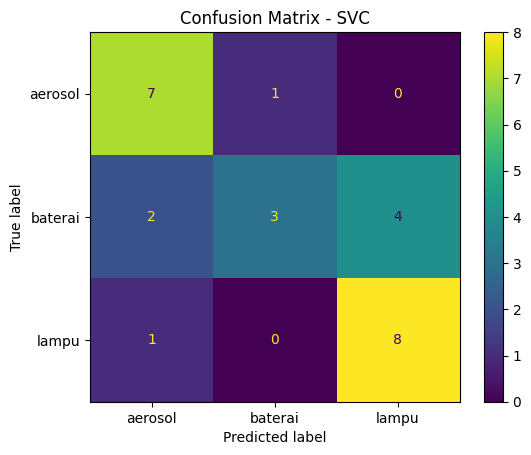

--------------------------------------------------
Tuning AdaBoost...
Best params for AdaBoost: {'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 200}
Best CV accuracy for AdaBoost: 0.6667
Classification report for AdaBoost:
               precision    recall  f1-score   support

     aerosol       0.62      1.00      0.76         8
     baterai       0.71      0.56      0.62         9
       lampu       1.00      0.67      0.80         9

    accuracy                           0.73        26
   macro avg       0.78      0.74      0.73        26
weighted avg       0.78      0.73      0.73        26

Confusion Matrix for AdaBoost:


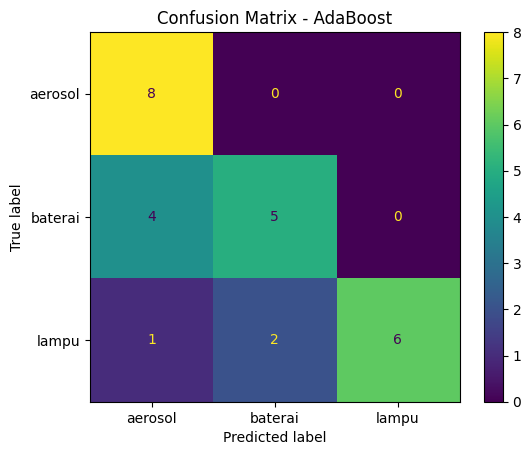

--------------------------------------------------
Tuning RandomForest...
Best params for RandomForest: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__n_estimators': 200}
Best CV accuracy for RandomForest: 0.7148
Classification report for RandomForest:
               precision    recall  f1-score   support

     aerosol       0.64      0.88      0.74         8
     baterai       0.80      0.44      0.57         9
       lampu       0.70      0.78      0.74         9

    accuracy                           0.69        26
   macro avg       0.71      0.70      0.68        26
weighted avg       0.72      0.69      0.68        26

Confusion Matrix for RandomForest:


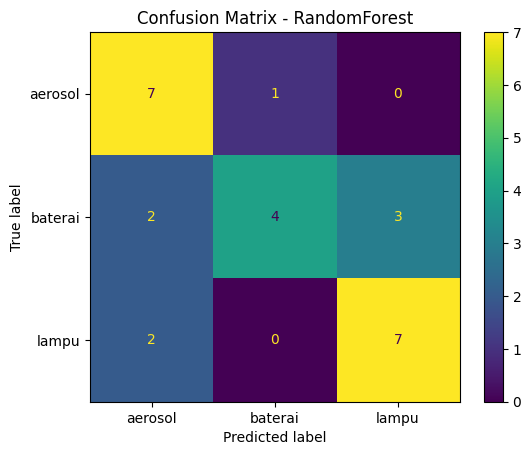

--------------------------------------------------


In [85]:
best_models = {}

for name in pipelines:
    print(f"Tuning {name}...")
    grid = GridSearchCV(pipelines[name], params[name], cv=5, n_jobs=-1, scoring='accuracy')
    grid.fit(X_train, y_train)
    
    print(f"Best params for {name}: {grid.best_params_}")
    print(f"Best CV accuracy for {name}: {grid.best_score_:.4f}")
    
    best_models[name] = grid.best_estimator_

    y_pred = best_models[name].predict(X_test)
    
    print(f"Classification report for {name}:\n", classification_report(y_test, y_pred))
    
    # Confusion matrix
    print(f"Confusion Matrix for {name}:")
    disp = ConfusionMatrixDisplay.from_estimator(best_models[name], X_test, y_test)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    print("-" * 50)

In [86]:
joblib.dump(best_models['SVC'], 'best_svc_model.joblib')

['best_svc_model.joblib']